<a href="https://colab.research.google.com/github/OmmMalhotra02/Project1/blob/main/graphGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Classified as: bellmanFord


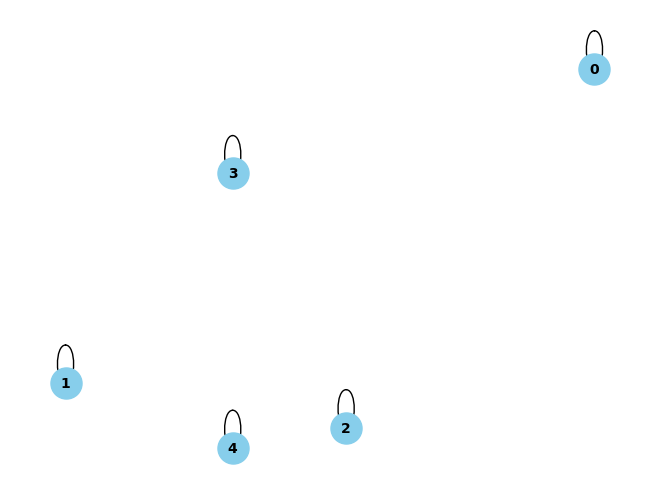

In [1]:
# Notebook 2: Graph Generation from Handwritten Diagrams

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import Libraries
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import cv2
import numpy as np
import networkx as nx # graph studying
import matplotlib.pyplot as plt

# Step 3: Define the VGGNet Model
VGG_types = {
    "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG16": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
    "VGG19": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"]
}

VGGType = "VGG16"

class VGGnet(nn.Module):
    def __init__(self, in_channels=3, num_classes=1000):
        super(VGGnet, self).__init__()
        self.in_channels = in_channels
        self.conv_layers = self.create_conv_layers(VGG_types[VGGType])
        self.fcs = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fcs(x)
        return x

    def create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            if type(x) == int:
                out_channels = x

                layers += [
                    nn.Conv2d(
                        in_channels=in_channels,
                        out_channels=out_channels,
                        kernel_size=(3, 3),
                        stride=(1, 1),
                        padding=(1, 1),
                    ),
                    nn.BatchNorm2d(x),
                    nn.ReLU(),
                ]
                in_channels = x
            elif x == "M":
                layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]

        return nn.Sequential(*layers)

# Step 4: Preprocess Image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    return binary_image

# Step 5: Classify Image
def classify_image(image_path, model, device):
    transform = transforms.Compose([
                transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Step 6: Extract Graph Elements
def extract_graph_elements(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    nodes = []
    edges = []

    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        if radius > 10:  # Adjust this threshold based on your dataset
            nodes.append(center)
        else:
            edges.append(contour)

    return nodes, edges

# Step 7: Reconstruct and Display Graph
def reconstruct_and_display_graph(nodes, edges):
    G = nx.Graph()
    for i, node in enumerate(nodes):
        G.add_node(i, pos=node)

    for edge in edges:
        if len(edge) > 1:
            (x1, y1), (x2, y2) = edge[0][0], edge[-1][0]
            node1 = min(range(len(nodes)), key=lambda i: np.linalg.norm(np.array(nodes[i]) - np.array((x1, y1))))
            node2 = min(range(len(nodes)), key=lambda i: np.linalg.norm(np.array(nodes[i]) - np.array((x2, y2))))
            G.add_edge(node1, node2)

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold")
    plt.show()

# Step 8: Define Paths and Load Model
image_path = '/content/drive/My Drive/dataset/test/some_image.png'  # Replace with your image path
model_path = '/content/drive/My Drive/vgg_model.pth'  # Replace with your model path

device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 5  # Replace with the number of classes in your dataset
model = VGGnet(in_channels=3, num_classes=num_classes).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))

# Step 9: Preprocess Image
binary_image = preprocess_image(image_path)

# Step 10: Classify Image
class_index = classify_image(image_path, model, device)
class_names = ['bellmanFord', 'dijkstra', 'useCase', 'sequence', 'activity']  # Replace with your class names
print(f"Classified as: {class_names[class_index]}")

# Step 11: Extract Graph Elements
nodes, edges = extract_graph_elements(binary_image)

# Step 12: Reconstruct and Display Graph
reconstruct_and_display_graph(nodes, edges)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classified as: bellmanFord


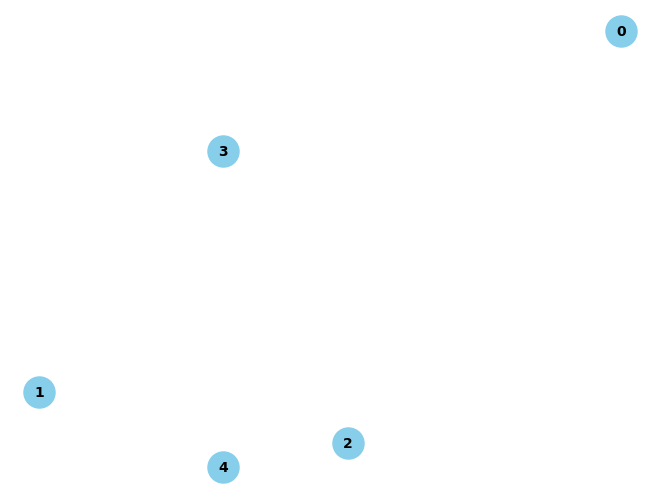

In [10]:
# Notebook 2: Graph Generation from Handwritten Diagrams

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import Libraries
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Step 3: Define the VGGNet Model
VGG_types = {
    "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG16": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
    "VGG19": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"]
}

VGGType = "VGG16"

class VGGnet(nn.Module):
    def __init__(self, in_channels=3, num_classes=1000):
        super(VGGnet, self).__init__()
        self.in_channels = in_channels
        self.conv_layers = self.create_conv_layers(VGG_types[VGGType])
        self.fcs = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fcs(x)
        return x

    def create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            if type(x) == int:
                out_channels = x

                layers += [
                    nn.Conv2d(
                        in_channels=in_channels,
                        out_channels=out_channels,
                        kernel_size=(3, 3),
                        stride=(1, 1),
                        padding=(1, 1),
                    ),
                    nn.BatchNorm2d(x),
                    nn.ReLU(),
                ]
                in_channels = x
            elif x == "M":
                layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]

        return nn.Sequential(*layers)

# Step 4: Preprocess Image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    return binary_image

# Step 5: Classify Image
def classify_image(image_path, model, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Step 6: Extract Graph Elements
def extract_graph_elements(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    nodes = []
    edges = []

    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        if radius > 10:  # Adjust this threshold based on your dataset
            nodes.append(center)
        else:
            edges.append(contour)

    return nodes, edges

# Step 7: Refine Edge Detection
def refine_edges(edges, nodes):
    refined_edges = []
    for edge in edges:
        if len(edge) > 1:
            (x1, y1), (x2, y2) = edge[0][0], edge[-1][0]
            # Find the closest nodes for the start and end points of the edge
            node1 = min(range(len(nodes)), key=lambda i: np.linalg.norm(np.array(nodes[i]) - np.array((x1, y1))))
            node2 = min(range(len(nodes)), key=lambda i: np.linalg.norm(np.array(nodes[i]) - np.array((x2, y2))))
            if node1 != node2:
                refined_edges.append((node1, node2))
    return refined_edges

# Step 8: Reconstruct and Display Graph
def reconstruct_and_display_graph(nodes, edges):
    G = nx.DiGraph()  # Directed graph
    for i, node in enumerate(nodes):
        G.add_node(i, pos=node)

    refined_edges = refine_edges(edges, nodes)
    for edge in refined_edges:
        G.add_edge(*edge)

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
    plt.show()

# Step 9: Define Paths and Load Model
image_path = '/content/drive/My Drive/dataset/test/some_image.png'  # Replace with your image path
model_path = '/content/drive/My Drive/vgg_model.pth'  # Replace with your model path

device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 5  # Replace with the number of classes in your dataset
model = VGGnet(in_channels=3, num_classes=num_classes).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))

# Step 10: Preprocess Image
binary_image = preprocess_image(image_path)

# Step 11: Classify Image
class_index = classify_image(image_path, model, device)
class_names = ['bellmanFord', 'dijkstra', 'useCase', 'sequence', 'activity']  # Replace with your class names
print(f"Classified as: {class_names[class_index]}")

# Step 12: Extract Graph Elements
nodes, edges = extract_graph_elements(binary_image)

# Step 13: Reconstruct and Display Graph
reconstruct_and_display_graph(nodes, edges)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os

In [ ]:
VGG_types = {
    "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG16": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
    "VGG19": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"]
}

VGGType = "VGG16"

class VGGnet(nn.Module):
    def __init__(self, in_channels=3, num_classes=1000):
        super(VGGnet, self).__init__()
        self.in_channels = in_channels
        self.conv_layers = self.create_conv_layers(VGG_types[VGGType])
        self.fcs = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fcs(x)
        return x

    def create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            if type(x) == int:
                out_channels = x

                layers += [
                    nn.Conv2d(
                        in_channels=in_channels,
                        out_channels=out_channels,
                        kernel_size=(3, 3),
                        stride=(1, 1),
                        padding=(1, 1),
                    ),
                    nn.BatchNorm2d(x),
                    nn.ReLU(),
                ]
                in_channels = x
            elif x == "M":
                layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]

        return nn.Sequential(*layers)

In [ ]:
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    return binary_image

def classify_image(image_path, model, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

def extract_graph_elements(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    nodes = []
    edges = []

    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        if radius > 10:  # Adjust this threshold based on your dataset
            nodes.append(center)
        else:
            edges.append(contour)

    return nodes, edges

def reconstruct_and_display_graph(nodes, edges):
    G = nx.Graph()
    for i, node in enumerate(nodes):
        G.add_node(i, pos=node)

    for edge in edges:
        (x1, y1), (x2, y2) = edge[0][0], edge[1][0]
        node1 = min(range(len(nodes)), key=lambda i: np.linalg.norm(np.array(nodes[i]) - np.array((x1, y1))))
        node2 = min(range(len(nodes)), key=lambda i: np.linalg.norm(np.array(nodes[i]) - np.array((x2, y2))))
        G.add_edge(node1, node2)

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold")
    plt.show()


In [ ]:
import cv2
import numpy as np

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    return binary_image


In [ ]:
from torchvision import transforms
from PIL import Image

def classify_image(image_path, model, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()


In [ ]:
def extract_graph_elements(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    nodes = []
    edges = []

    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        if radius > 10:  # Adjust this threshold based on your dataset
            nodes.append(center)
        else:
            edges.append(contour)

    return nodes, edges


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def reconstruct_and_display_graph(nodes, edges):
    G = nx.Graph()
    for i, node in enumerate(nodes):
        G.add_node(i, pos=node)

    for edge in edges:
        (x1, y1), (x2, y2) = edge[0][0], edge[1][0]
        node1 = min(range(len(nodes)), key=lambda i: np.linalg.norm(np.array(nodes[i]) - np.array((x1, y1))))
        node2 = min(range(len(nodes)), key=lambda i: np.linalg.norm(np.array(nodes[i]) - np.array((x2, y2))))
        G.add_edge(node1, node2)

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold")
    plt.show()


In [ ]:
# Define paths and model
image_path = '/content/drive/My Drive/dataset/test/some_image.png'  # Replace with your image path
model_path = '/content/drive/My Drive/vgg_model.pth'  # Replace with your model path

# Load model
device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 5  # Replace with the number of classes in your dataset
model = VGGnet(in_channels=3, num_classes=num_classes).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))

# Preprocess image
binary_image = preprocess_image(image_path)

# Classify image
class_index = classify_image(image_path, model, device)
class_names = ['bellmanFord', 'dijkstra', 'useCase', 'sequence', 'activity']  # Replace with your class names
print(f"Classified as: {class_names[class_index]}")

# Extract graph elements
nodes, edges = extract_graph_elements(binary_image)

# Reconstruct and display graph
reconstruct_and_display_graph(nodes, edges)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/vgg_model.pth'